In [8]:
import pandas as pd
import matplotlib.pyplot as plt
arrest = pd.read_csv("arrest_data.csv", sep=",")

In [4]:
arrest_dict = dict()
for index, row in arrest.iterrows():
    neighborhood_a = row['INCIDENTNEIGHBORHOOD']
    if neighborhood_a not in arrest_dict:
        arrest_dict[neighborhood_a] = 1
    else:
        arrest_dict[neighborhood_a] = arrest_dict[neighborhood_a] + 1
#arrest_dict

In [5]:
census = pd.read_csv("population-density.csv", sep=",")

In [6]:
census_dict = dict()
for index, row in census.iterrows():
    neighborhood_c = row['Neighborhood']
    if neighborhood_c not in census_dict:
        val = row['Pop. 2010']
        val = val.replace(',', '')
        census_dict[neighborhood_c] = int(val)
#census_dict

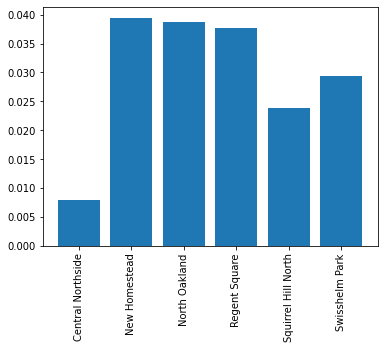

In [26]:
arrest_to_pop_ratio = dict()
top_5 = dict()
for key in census_dict:
        if key in arrest_dict:
            pop = census_dict[key]
            arrests = arrest_dict[key]
            ratio = arrests/pop
            arrest_to_pop_ratio[key] = ratio
            if ratio < 0.04:
                top_5[key] = ratio
#arrest_to_pop_ratio
neigh = list(top_5.keys())
val = list(top_5.values())
plt.bar(range(len(top_5)), val, tick_label=neigh, width=.8)
plt.xticks(rotation=90)
plt.subplots_adjust(bottom=0.05)
plt.show()

## Conclusion
---
After counting the number of arrests in each neighborhood, I used census data from 2010 to figure out the population of each neighborhood. If the neighborhood was included in both datasets, I found the ratio between the number of arrests and the population of each neighborhood. Whichever one of these ratios was the lowest will determine which neighborhood is the best to live in. I will list the top 5 for the sole purpose of comparing to the other submetrics that my group members have, here are the top 5 neighborhoods, from best to "worst".
1. Central Northside = 0.00786862812179268
2. Squirrel Hill North = 0.023761330634515535
3. Swisshelm Park = 0.029390154298310066
4. Regent Square = 0.03771551724137931
5. North Oakland = 0.03876409818974505